## Predicting Sentiment Based on Drug Product User Reviews (Using Real World Data) for Informed Decision Making - Part 1

### Sentiment Analysis Using a Supervised Binary Text Classifier


## 1. Introduction 

A very interesting business application of text classification is sentiment analysis. It is a method to automatically understand the perception of customers towards a product or service based on their comments. The input text is classified into positive, negative, and in some situations, neutral. It is extensively used by companies to track user behavior on social media. Sentiment analysis can strongly influence the marketing strategy of a company, improving the customer experience and defining the advertising roadmap[3].

The evaluation of drug aspects (i.e. side effects, dosage, efficacy etc) heavily relies on randomized controlled trials with rigorous inclusion and exclusion criteria. However, such processes are limited to a small number of individuals enrolled in the study and are constrained to participants in the target population who meet possibly restrictive eligibility criteria, limiting the population representativeness and subsequent study generalizability. 

The ramifications of these acclimations could potentially have resulted in the overestimation of the efficacy of the product and misidentification of adverse events/ side effects in the diverse population. Not to mention the heavy costs and time involved. To counter such issues, approaches such as post-marketing drug surveillance have been introduced to optimize the safety of the drug after its regulatory approval and mass production e.g government regulators such as the FDA (US based) or MHRA (UK based) or public/ private organisations to monitor side effects from drugs. Existing methods for identifying adverse events typically focused on analyzing molecular drug composition, query logs, VAERS (Vaccine Adverse Event Reporting System) records, or clinical notes in the medical records.  **However, sentiment or user reviews from consumers were never taken into account.**

Nevertheless, publicly available information on the Internet offers an easily attainable resource that could be leveraged to gain a deep understanding of the drug reviews by the users. Entire user reviews are fully available on drug review websites, on which users can comment on their personal experiences of the drugs they have taken for a specific condition.

Unlike many other forms of medical data, this information is not filtered through medical professionals. Since these reviews are given by anonymous users, there is no risk of patient health record violation for confidentiality. These reviews contain a plethora of information regarding individual experiences associated with the drugs such as symptoms, adverse events, and interactions with other drugs. Such reviews have also contained an extensive amount of user sentiment related to a particular condition, which could be leveraged to detect the side effects and efficacy of drugs.[1]


### Objectives 

The insights gained through public review (drug user reviews) analysis can influence strategy for better performance.  Automatic analysis of patient posts on forums or social media have received attention in the last few years as a direct source that can help in understanding patients, enhancing the quality of care and increase patient satisfaction. Previously, we had to rely on governing bodies/ trials for feedback on drugs, as stated above[2]. 

The application of the proposed sentiment analysis approach will be useful not only for patients, but also for drug makers and clinicians to obtain valuable summaries of public opinion. Since sentiment analysis is domain specific, domain knowledge in drug reviews can be incorporated into the sentiment analysis algorithm to provide more accurate analysis. In particular and for example, MetaMap is used to map various health and medical terms (such as disease and drug names) to semantic types in the Unified Medical Language System (UMLS) Semantic Network.[3]

Sentiment analysis is the process of measuring automatically the type of opinion, i.e. positive, negative or neutral, expressed in text.

Thus, our objective is to:

Review sentiment based on these drug user reviews text/ dataset, using a supervised binary text classifier, which will classify user reviews as positive or negative. Ultimately this can help us predict the sentiments concerning overall satisfaction of these drugs. Which in turn, can provide valuable insights and help with decision making.

The results (metrics obtained from our classification approach) can determine which text classifier/ model works well, or more specifically, prove the most accurate with our chosen data set.


### Dataset

The dataset was retrieved from Kaggle [5]. A platform which allows users to source their data sets and explore/ build upon them (license or rules permitting). The Drug Review Dataset is taken from the UCI Machine Learning Repository. This Dataset provides over 200,000 patient drug reviews on specific drugs along with related conditions and a 10-star patient rating reflecting the overall patient satisfaction. The actual data was scraped from online pharmaceutical review sites.

The license is other.

The data is split into a train (70%) a test (30%) partition (train set consists of 161297 samples, test set consists of 53766 samples of drug reviews) and stored in two .csv (comma-separated-values) files, respectively.

* drugName (categorical): name of drug
* condition (categorical): name of condition
* review (text): patient review
* rating (numerical): 10 star patient rating
* date (date): date of review entry
* usefulCount (numerical): number of users who found review useful

The structure of the data is that a patient with a unique ID purchases a drug that meets their condition and writes a review and rating for the drug he/she purchased on the date. Afterwards, if the others read that review and find it helpful, they will click usefulCount, which will add 1 for the variable.

The size of the training file is 83MB and the associated test set is 27.6MB, hence a total size of 110.6MB. there are 14 columns, 6 of which are string type, 4 are integer type, 2 are DateTime format and 2 are 'other'.  

The dataset was originally published on the UCI Machine Learning repository Felix Gräßer, Surya Kallumadi, Hagen Malberg, and Sebastian Zaunseder. 2018. Aspect-Based Sentiment Analysis of Drug Reviews Applying Cross-Domain and Cross-Data Learning. In Proceedings of the 2018 International Conference on Digital Health (DH '18). ACM, New York, NY, USA, 121-125.

The file format is .csv, which is a delimited text file, that uses commas to separate values. 

To summarize, this dataset has a good usuability score of 8.8, where it's easy to intepret and includes all the relevant metadata. Hence, after some research, it was evident this is a good quality data set for the topic of text classification in the healthcare arena, more specifically sentiment analysis on drug product reviews.

Techniques, insights, findings, rational and caveats behind the code are presented with Python comments, docstrings and individual summaries below:


### Evaluation Methodology 

Given that the review rating is in range of 1-10,  2 classes were utilised (positive and negative), i.e. this is a supervised binary classification problem. We consider the review to be positive if the rating is higher than 5 (this is a somewhat arbitrary choice, but seems reasonable).

In this case, metrics will be 1) overall accuracy 2) F1 per class 3) F1 macro average.  We are using accuracy (comparing to most frequent class baseline) and F-score for each class. That covers most probable failure modes [11].

How do we evaluate the classifier's performance? One way of evaluating the performance of an algorithm is to measure the accuracy. That is the percentage of correctly classified examples from the total number of samples. And we can do that by:

**F1 per class (F1-score for a binary classifier)**
We would like to summarize the models’ performance into a single metric. That’s where F1-score are used. It’s a way to combine precision and recall into a single number. F1-score is computed using a mean (“average”), but not the usual arithmetic mean. It uses the harmonic mean, which is given by this simple formula:

**F1-score = 2 × (precision × recall)/(precision + recall)**

Similar to arithmetic mean, the F1-score will always be somewhere in between precision and recall. But it behaves differently: the F1-score gives a larger weight to lower numbers. For example, when Precision is 100% and Recall is 0%, the F1-score will be 0%, not 50%. Or for example, say that Classifier A has precision = recall = 80%, and Classifier B has precision = 60%, recall = 100%. Arithmetically, the mean of the precision and recall is the same for both models. But when we use F1’s harmonic mean formula, the score for Classifier A will be 80%, and for Classifier B it will be only 75%. Model B’s low precision score pulled down its F1-score.

As F1 score gives equal weighting to precision and recall, it is perfect for our binary classifer.
 
**F1 macro average** 

The next step is combining the per-class F1-scores into a single number, the classifier’s overall F1-score. There are a few ways of doing that. Let’s begin with the simplest one: an arithmetic mean of the per-class F1-scores. This is called the macro-averaged F1-score, or the macro-F1 for short, and is computed as a simple arithmetic mean of our per-class F1-scores.

Macro F1-score will give the same importance to each label/class. It will be low for models that only perform well on the common classes while performing poorly on the rare classes.

The Macro F1-score is defined as the mean of class-wise/label-wise F1-scores:

$$Macro F1-score = \frac{1}{N} \sum \limits _{i=0} ^{N} F1-score_{i}$$









The metrics are defined by the software packages, sklearn. This is the most popular machine learning package, and it provides the sklearn.metrics.f1_score function, which computes Macro-F1 .

Finally, the F1-score is possibly the most common metric used on imbalanced classification problems, such as our dataset [15].
 

## Implementation


### Preprocessing


In [ ]:
#!pip install -r requirements.txt

In [2]:
# importing libraries
import pandas as pd, numpy as np
import statistics

# to ignore any warning messages.
import warnings
warnings.filterwarnings('ignore')

# for visualization
import matplotlib
import matplotlib.pyplot as plt, seaborn as sb
import plotly.express as px
import wordcloud

# for unit testing
from unittest.mock import patch, Mock
import unittest

#for machine learning
import scipy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


#for text preprocessing
import re
import nltk
import nltk.stem as Stemmer
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
#Stop words present in the nltk library
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

from nltk.tokenize import word_tokenize
#importing the Stemming function from nltk library

from nltk.stem.porter import PorterStemmer
from nltk.stem import porter
from nltk.stem import WordNetLemmatizer
Stemmer=porter.PorterStemmer()


import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 200
%matplotlib inline
import os

#for language detection
#import langdetect

#for sentiment. only used when no training data
#from textblob import TextBlob

#for progress visualization
from tqdm import tqdm
tqdm.pandas()

#for vectorizer
from sklearn import feature_extraction, manifold

#for word embedding
import gensim.downloader as gensim_api

#for topic modeling
import gensim

#dealing with date feature
from datetime import datetime

# for error handling
from traceback import format_exc

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/stephenmalcolm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#first, check we're using the right file type/encoder i.e. it should be UTF-8
#this ensures, it's relatively clean, and can be read and organised (as opposed to some other unusable formats)
import pandas as pd
import csv
train = open('drugsComTrain_raw.csv', 'r')
test = open('drugsComTest_raw.csv', 'r')
train

<_io.TextIOWrapper name='drugsComTrain_raw.csv' mode='r' encoding='UTF-8'>

In [4]:
#we have the correct file encoder, as stated in the above output
#now, import the datasets and read the training set

import csv
train=pd.read_csv('drugsComTrain_raw.csv')#no sentiment lexicons required (manually curated wordlists), 
#as we have plenty of training data here - scraped from drug user review websites
test=pd.read_csv('drugsComTest_raw.csv')

train.head().append(train.tail())

uniqueID                  drugName                     condition  \
0         206461                 Valsartan  Left Ventricular Dysfunction   
1          95260                Guanfacine                          ADHD   
2          92703                    Lybrel                 Birth Control   
3         138000                Ortho Evra                 Birth Control   
4          35696  Buprenorphine / naloxone             Opiate Dependence   
161292    191035                   Campral            Alcohol Dependence   
161293    127085            Metoclopramide               Nausea/Vomiting   
161294    187382                   Orencia          Rheumatoid Arthritis   
161295     47128        Thyroid desiccated           Underactive Thyroid   
161296    215220              Lubiprostone         Constipation, Chronic   

                                                                                                                                                                                                         review  \
0                                                                                                                               "It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"   
1       "My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get ou...   
2       "I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not ava...   
3       "This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is...   
4       "Suboxone has completely turned my life around.  I feel healthier, I&#039;m excelling at my job and I always have money in my pocket and my savings account.  I had none of those before Suboxone an...   
161292  "I wrote my first report in Mid-October of 2014.  I have not had any alcohol at all since that post, have reduced my dosage to 1 pill first thing in the morning.  I am a very social person, and en...   
161293  "I was given this in IV before surgey. I immediately became anxious and could not sit still . The PA said &quot;oh yes this happens sometimes&quot;. They had to give me Benadryl to calm me down. I...   
161294                                                                                                          "Limited improvement after 4 months, developed bad rash and MD refused to continue medication."   
161295  "I&#039;ve been on thyroid medication 49 years, I spent my first 38 on Synthroid and various t4 formulas, I could not stand the up and down of Synthroid, it never was steady. Every time I went to ...   
161296  "I&#039;ve had chronic constipation all my adult life. Tried Linzess, it worked for a month then stopped. Doctor started me on Amitiza (24 mg) and it is a miracle. I&#039;ve been on for four month...   

        rating       date  usefulCount  
0            9  20-May-12           27  
1            8  27-Apr-10          192  
2            5  14-Dec-09           17  
3            8   3-Nov-15           10  
4            9  27-Nov-16           37  
161292      10  31-May-15          125  
161293       1   1-Nov-11           34  
161294       2  15-Mar-14           35  
161295      10  19-Sep-15           79  
161296       9  13-Dec-14          116

In [5]:
#as both datasets contain the same columns, we can then combine them for efficient preprocessing and 
#better analysis

data = pd.concat([train, test])
data.head()

uniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                                                                                                                                                                                    review  \
0                                                                                                                          "It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"   
1  "My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get ou...   
2  "I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not ava...   
3  "This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is...   
4  "Suboxone has completely turned my life around.  I feel healthier, I&#039;m excelling at my job and I always have money in my pocket and my savings account.  I had none of those before Suboxone an...   

   rating       date  usefulCount  
0       9  20-May-12           27  
1       8  27-Apr-10          192  
2       5  14-Dec-09           17  
3       8   3-Nov-15           10  
4       9  27-Nov-16           37

In [6]:
#Let's check the number of rows and columns
data.shape

(215063, 7)

In [7]:
#Let's check for missing values (Nan) 
#From above output, we have 7 columns
data.isnull().sum()

uniqueID          0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64

In [8]:
#lets create a data type function for displaying null values and data types [7]
def finding_null_value(data):

    total_null = data.isnull().sum()           

    total_percent = (data.isnull().sum()/data.isnull().count()*100) 
    
    
    new_var = pd.concat([total_null, total_percent], axis=1, keys=['Total_null', 'Total_percent(%)'])


    types_array = []
    for column in data.columns:
        dtype = str(data[column].dtype)
        types_array.append(dtype)
    new_var['Types'] = types_array

    return(np.transpose(new_var))

In [9]:
#The data type function displays:
# 1. Total null values 
# 2. Total percentage 
# 3. Display types of every feature (don't need to use Dtypes command, however, we'll still demonstrate below) 
finding_null_value(data)

uniqueID drugName condition  review rating    date  \
Total_null              0        0      1194       0      0       0   
Total_percent(%)        0        0  0.555186       0      0       0   
Types               int64   object    object  object  int64  object   

                 usefulCount  
Total_null                 0  
Total_percent(%)           0  
Types                  int64

In [10]:
# calculating the number of rows dropped due to null conditions
#'condition' is a critical feature and a string, hence we cannot replace with a mean or frequency
# we must then drop these rows where 'condition' is a null/NaN value
data.dropna(subset=["condition"], axis=0, inplace=True)


# reset index, because we droped 1194 rows
# resetting the index to avoid errors, if accessing rows by their indexes
data.reset_index(drop=True, inplace=True)
data


uniqueID                  drugName                     condition  \
0         206461                 Valsartan  Left Ventricular Dysfunction   
1          95260                Guanfacine                          ADHD   
2          92703                    Lybrel                 Birth Control   
3         138000                Ortho Evra                 Birth Control   
4          35696  Buprenorphine / naloxone             Opiate Dependence   
...          ...                       ...                           ...   
213864    159999                 Tamoxifen     Breast Cancer, Prevention   
213865    140714              Escitalopram                       Anxiety   
213866    130945            Levonorgestrel                 Birth Control   
213867     47656                Tapentadol                          Pain   
213868    113712                 Arthrotec                      Sciatica   

                                                                                                                                                                                                         review  \
0                                                                                                                               "It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"   
1       "My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get ou...   
2       "I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not ava...   
3       "This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is...   
4       "Suboxone has completely turned my life around.  I feel healthier, I&#039;m excelling at my job and I always have money in my pocket and my savings account.  I had none of those before Suboxone an...   
...                                                                                                                                                                                                         ...   
213864  "I have taken Tamoxifen for 5 years. Side effects are severe sweating and depression. I have been taking Effexor XR longer than I have been on Tamoxifen. My Oncologist increased the Effexor dosage...   
213865  "I&#039;ve been taking Lexapro (escitaploprgram) since February. First, I&#039;d like to mention that you can NOT take this drug for a week or less and expect to magically feel better; I felt real...   
213866  "I&#039;m married, 34 years old and I have no kids. Taking the pill was such a hassle so I decided to get the Mirena. It was very painful when it was inserted,then had cramping for the rest of tha...   
213867  "I was prescribed Nucynta for severe neck/shoulder pain. After taking only 2, 75mg pills I was rushed to the ER with severe breathing problems. I have never had any issues with pain medicines befo...   
213868                                                                                                                                                                                            "It works!!!"   

        rating       date  usefulCount  
0            9  20-May-12           27  
1            8  27-Apr-10          192  
2            5  14-Dec-09           17  
3            8   3-Nov-15           10  
4            9  27-Nov-16           37  
...        ...        ...          ...  
213864      10  13-Sep-14           43  
213865       9   8-Oct-16           11  
213866       8  15-Nov-10            7  
213867       1  28-Nov-11           20  
213868       9  13-Sep-09           46  

[213869 rows x 7 columns]

In [11]:
#let's check data types

#This gives us an extra step to check that there's no mistakes or no unexpected values in our data.

#This extra step is very useful for plotting as well, because if we plot an ordinal variable, Pandas and 
#Matplotlib will obey this natural ordering of the values, whereas if we didn't do that, the visualization would 
#tend to be sorted alphabetically, which can make things very confusing. This early stage of pre-processing 
#definitely gives us some benefits when it comes to visualization[7].

data.dtypes

uniqueID        int64
drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
dtype: object

In [12]:
#let's first modify drugName, condition and review to category
#Set the nominal (non-ordered categorical) data types from object to category type

data['drugName']=data['drugName'].astype('category')
data['condition']=data['condition'].astype('category')
data['review']=data['review'].astype('category')
data.dtypes

uniqueID          int64
drugName       category
condition      category
review         category
rating            int64
date             object
usefulCount       int64
dtype: object

In [13]:
#then modify date object to string
data['date']=data['date'].astype('string')

In [14]:
#We can see below, the specified objects that were once object, have now been transformed into the correct category

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213869 entries, 0 to 213868
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   uniqueID     213869 non-null  int64   
 1   drugName     213869 non-null  category
 2   condition    213869 non-null  category
 3   review       213869 non-null  category
 4   rating       213869 non-null  int64   
 5   date         213869 non-null  string  
 6   usefulCount  213869 non-null  int64   
dtypes: category(3), int64(3), string(1)
memory usage: 14.4 MB


In [15]:
#quick and dirty summary statistics

data.describe(include='all')

uniqueID        drugName      condition  review         rating  \
count   213869.000000          213869         213869  213869  213869.000000   
unique            NaN            3667            916  128449            NaN   
top               NaN  Levonorgestrel  Birth Control  "Good"            NaN   
freq              NaN            4896          38436      39            NaN   
mean    116076.924786             NaN            NaN     NaN       6.991149   
std      67016.705794             NaN            NaN     NaN       3.275792   
min          0.000000             NaN            NaN     NaN       1.000000   
25%      58122.000000             NaN            NaN     NaN       5.000000   
50%     115972.000000             NaN            NaN     NaN       8.000000   
75%     174018.000000             NaN            NaN     NaN      10.000000   
max     232291.000000             NaN            NaN     NaN      10.000000   

            date    usefulCount  
count     213869  213869.000000  
unique      3579            NaN  
top     1-Mar-16            NaN  
freq         185            NaN  
mean         NaN      28.094118  
std          NaN      36.401377  
min          NaN       0.000000  
25%          NaN       6.000000  
50%          NaN      16.000000  
75%          NaN      36.000000  
max          NaN    1291.000000



- The top drugName is Levonorgestrel, hence a very popular choice. Delving deeper, Levonorgestrel is used to treat many conditions
- The top condition is Birth Control.
- The top review is just a single word "Good", but it has very small count. Only 39. 
- Most single day reviews came on 1-Mar-16. This date can be investigated further, and review which drugName and which conditions these reviews were for.

In [16]:
#perform deeper EDA
#preparing a separate DataFrame for analysis
data_explorer= data

# dropping some columns
data_explorer.drop(columns = ['usefulCount'], inplace = False)

# sorting rows in descending order of rating
data_explorer = data_explorer.sort_values('rating', ascending = False)

data_explorer.head()

uniqueID  drugName                                    condition  \
106934    132527   Doxepin                     Irritable Bowel Syndrome   
55269     151385   Chantix                            Smoking Cessation   
55267      24899    Deplin  41</span> users found this comment helpful.   
136264     52152  Adipex-P                                      Obesity   
136268    126034   Viibryd                                   Depression   

                                                                                                                                                                                                         review  \
106934  "Had symptoms of IBS D for years, after a bout with a bad colon infection. Following many tests, medication trials that all failed, a great GI specialist suggested doxepin, it was a miracle.  Try ...   
55269   "I&#039;m 62 years old and had been smoking since I was 12. For financial and health reasons decided it was time to quit. With the help of Chanix, I was able to quit after 3 weeks on the medicatio...   
55267   "I never responded to any medication for anxiety and depression, which was made worse by most medications. Deplin was a miracle for me. I started to use it this summer and my response was immediat...   
136264  "The first week I took Adipex I lost 10 pounds, it helped that I ran every morning but I was always edgy. I would work work work and had no desire to eat. Best diet pill so far. I&#039;ve read tha...   
136268  "Giving it a 10 after only 3 days might sound odd but comparing to other meds I have been on, it&#039;s a 10.  I was on Lexapro 20mg and Wellbutrin for a year and a half.  Stopped the meds cold tu...   

        rating       date  usefulCount  
106934      10  23-May-16           12  
55269       10  18-Dec-16           23  
55267       10   7-Dec-10           41  
136264      10   2-Jun-11           44  
136268      10   3-Oct-13           54

In [17]:
#ensure all unique ID's reflect actual number of rows from above dataframe (not including missing values)
#this tells us we don't have duplicate patients (unique ID's)
#213,869 is the correct output

#check uniqueID
data_explorer['uniqueID'].nunique()

213869

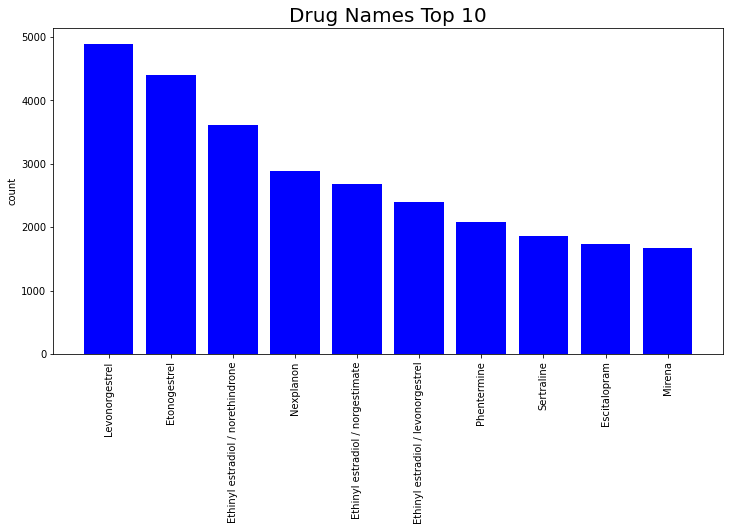

In [18]:
#plot a bargraph to check top 10 drugnames

#from bargraph below, we can see that:
#Levonorgestrel - Around 4,800 patients are taking this medication, the most popular drug here
#Over 3000 patients are taking the top 3 drugs 

#The top 3 drugName has count around 4000 and above.
#Most of the drugName counts are around 1500 if we look at top 10

plt.figure(figsize=(12,6))
drug_top = data_explorer['drugName'].value_counts(ascending = False).head(10)

plt.bar(drug_top.index,drug_top.values,color='blue')
plt.title('Drug Names Top 10',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

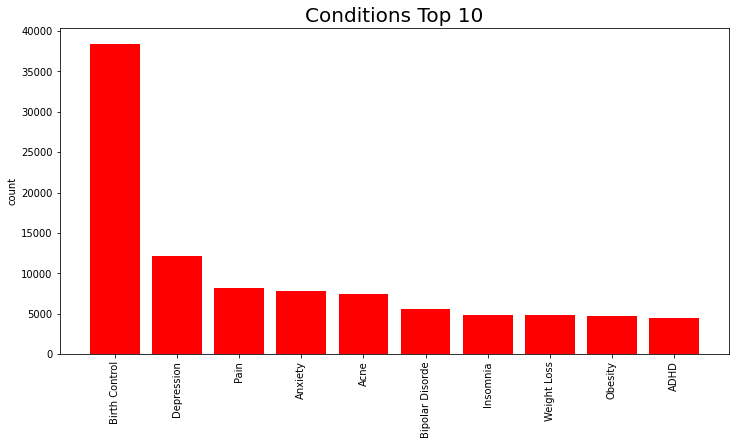

In [19]:
#plot a bargraph to check top 10 conditions

#from bargraph below, we can see that:
#Birth control - Between 35,000 to 40,000 patients have birth control conditions, the most popular condition here
#Approximately 3-7 times more popular than any of the other conditions
#Most of the conditions for the top 10 are between 5000 - 10,000

plt.figure(figsize=(12,6))
cond_top = data_explorer['condition'].value_counts(ascending = False).head(10)

plt.bar(cond_top.index,cond_top.values,color='red')
plt.title('Conditions Top 10',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

In [20]:
#check counts for ratings
#from the output below, rating '10'/ top rating produces the majority of the counts

ratings_ = data_explorer['rating'].value_counts().sort_values(ascending=False).reset_index().\
                    rename(columns = {'index' :'rating', 'rating' : 'counts'})
ratings_['percent'] = 100 * (ratings_['counts']/data_explorer.shape[0])
print(ratings_)

   rating  counts    percent
0      10   67682  31.646475
1       9   36499  17.066054
2       1   28769  13.451692
3       8   24909  11.646849
4       7   12470   5.830672
5       5   10650   4.979684
6       2    9203   4.303101
7       3    8662   4.050143
8       6    8403   3.929041
9       4    6622   3.096288


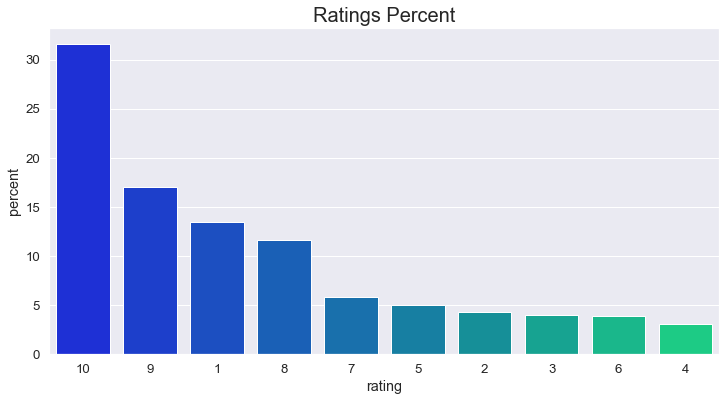

In [21]:
#as a percentage, this top ten rating produces just over 30%, or approximately a third of the counts

sb.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [12, 6]

#let's plot and check
sb.barplot(x = ratings_['rating'], y = ratings_['percent'],order = ratings_['rating'], palette='winter')
plt.title('Ratings Percent',fontsize=20)
plt.show()

In [22]:
#lets check the number of drugs per condition

#we can see from the output below, there's 219 drugs linked to treating pain
#however, there are 253 drugs (highest amount) linked to 'not listed/ other' conditions.  

#it may be possible that specific users didn't mention their condition, for privacy reasons. We can look up the 
#drug names and fill up the conditions for which that drug is used.

#there's possibly noise present in our dataset, possibly due to webscraping where the values are wrongly fed in here.

data_explorer.groupby('condition')['drugName'].nunique().sort_values(ascending=False).head(10)

condition
Not Listed / Othe       253
Pain                    219
Birth Control           181
High Blood Pressure     146
Acne                    127
Depression              115
Rheumatoid Arthritis    107
Diabetes, Type 2         97
Allergic Rhinitis        95
Insomnia                 85
Name: drugName, dtype: int64

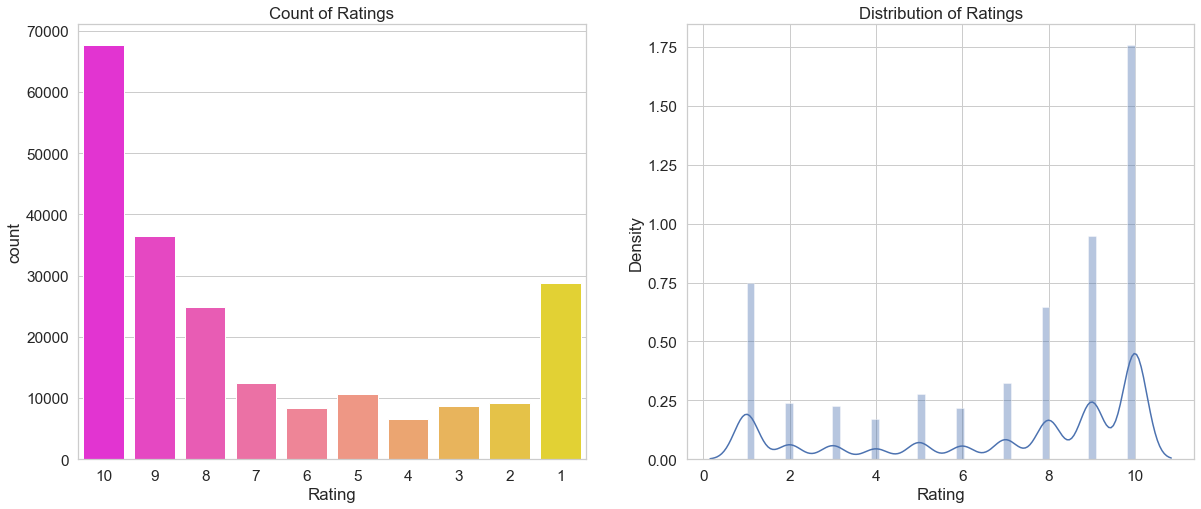

In [23]:
#from the output below, we produced a countplot and a distribution plot of the ratings. so we can see the how the 
#ratings are distributed throughout the data

#the 'Distribution of Ratings' plot below, portrays that the ratings are skewed to the left (the left tail or 
#smaller values is much longer than the right tail or larger values), which infers that most 
#drugs received a relatively high score.  how accurate is this? in an ideal world, we prefer a normal distribution.
#this may indicate a lack of medical knowledge as to what a low score indicates, versus a what is meant by a high 
#score.  thus, the ‘Reviews’ column is perhaps a better indicator of sentiment... 

plt.rcParams['figure.figsize'] = [20,8]
sb.set(font_scale = 1.4, style = 'whitegrid')
fig, ax = plt.subplots(1, 2)

sns_1 = sb.countplot(data['rating'], palette = 'spring', order = list(range(10, 0, -1)), ax = ax[0])
sns_2 = sb.distplot(data['rating'], ax = ax[1])
sns_1.set_title('Count of Ratings')
sns_1.set_xlabel("Rating")

sns_2.set_title('Distribution of Ratings')
sns_2.set_xlabel("Rating");

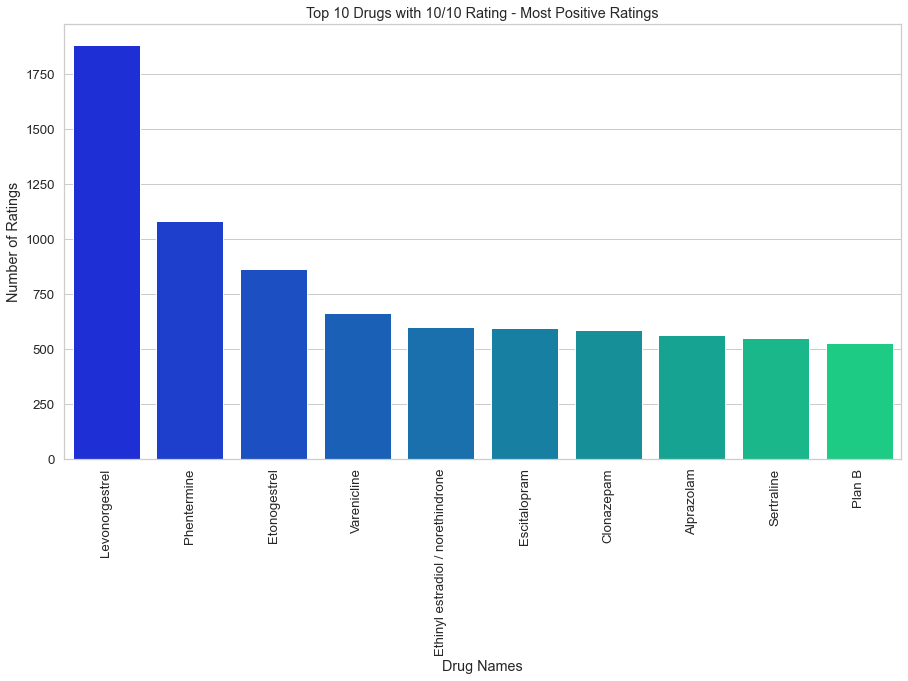

In [24]:
#the barplot below shows the top 10 drugs with the '10/10' rating which basically shows us which drugs have received 
#majorly positive ratings and reviews

sb.set(font_scale = 1.2, style = 'whitegrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sb.barplot(x = drugname[0:10], y = drug_rating[0:10], palette = 'winter')

sns_rating.set(title = 'Top 10 Drugs with 10/10 Rating - Most Positive Ratings', ylabel = 'Number of Ratings', xlabel = "Drug Names")

plt.setp(sns_rating.get_xticklabels(), rotation=90);

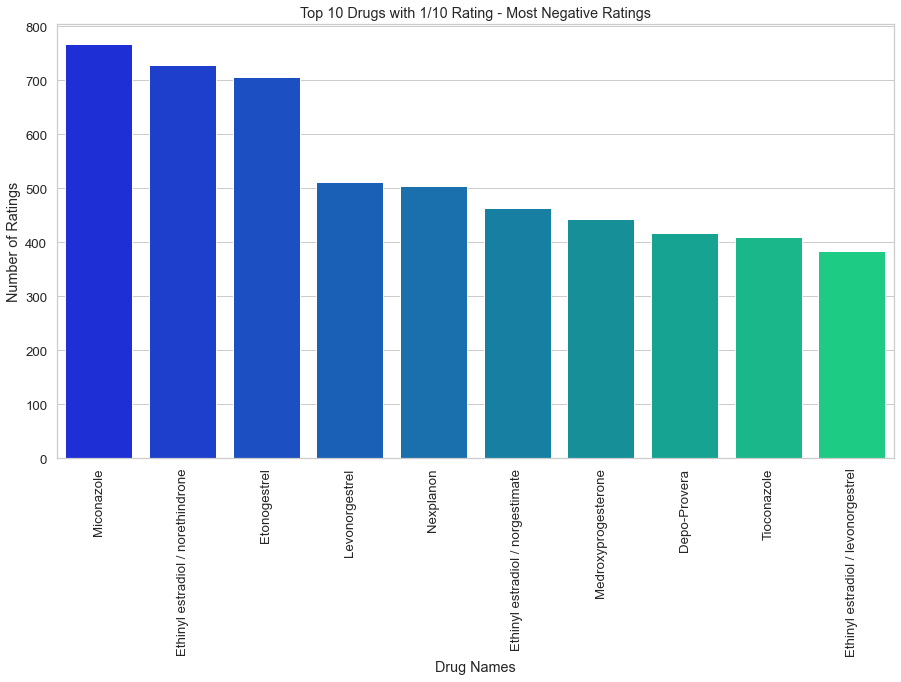

In [25]:
#the barplot below shows the top 10 drugs with the '1/10' rating which basically shows us which drugs have received 
#majorly negative ratings and reviews

#analysing the top 10 drugs with both 1/10 and 10/10 ratings:
#3 drugs appear (Levonorgestral, Etongestrel and Ethyl estradiol/ Norethindrone) in both the bottom 10 and top 10 
#ratings.  Hence, there are mixed reviews on these 3 particular drugs. Which infers not all drug reviews are
#100% positive or negative

sb.set(font_scale = 1.2, style = 'whitegrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sb.barplot(x = drugname[0:10], y = drug_rating[0:10], palette = 'winter')

sns_rating.set(title = 'Top 10 Drugs with 1/10 Rating - Most Negative Ratings', ylabel = 'Number of Ratings', xlabel = "Drug Names")

plt.setp(sns_rating.get_xticklabels(), rotation=90);

**Preprocessing Steps** [7]:
    
**This is Step 1 in our feature extraction process**

The kind of data we receive from customer feedback or user reviews is usually unstructured. It contains noise; unusual text and symbols that require to be cleaned, so that a machine learning model can process it. Data cleaning and pre-processing are as important as building any sophisticated machine learning model. The reliability of our model is highly dependent upon the quality of our data. [9].

As stated above, the description is in textual format which is not suitable for machine learning, in it's current format (in other words, we need to extract numeric features so that we can use them to train and test classifiers). We can also say, machine learning algorithms learn from a pre-defined set of features from the training data, to produce an output for the test data. 

As part of this task, we are expected to transform the textual description (review column) into a numeric feature matrix. One simple technique to do that is different embeddings, such as Term Frequency Inverse Document Frequency (TFIDF) and the Count Vectors (CV). Or apply, in Python using the sci-kit learn package. Before TF-IDF can be applied, we will need to clean up and prepare the textual data correctly. Here is a list of steps that we can apply to the review column before applying TF-IDF:

- Removing punctuations like . , ! $( ) * % @
- Removing URLs
- Removing Stop words
- Lower casing
- Tokenization
- Lemmatization
- Apply NGram Tokenization


In [26]:
#increases the quality of generated features
#includes synsets, a collection of synonymous words

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/stephenmalcolm/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
# function to preprocess a given text after applying several preprocessing functions

import re

wordnet_lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # lower case the text.It is one of the most common preprocessing steps where the text is converted into the same case preferably lower case
    text = text.lower()
    # Replacing the repeating pattern of &#039;
    text = text.replace("&#039;", "")
    # Removing all punctuation symboks from the text
    cleaned_text = "".join([i for i in text if i not in string.punctuation])
    # Removing all URLs from the text
    cleaned_text = re.sub(r'http\S+', '', cleaned_text)
    # Splitting the text into separate tokens. Each token is a word of the text.
    tokens = cleaned_text.split(" ")
    # All tokens that are also a stopword are filtered out as they are not really necessary for model building.
    filtered_tokens = [i for i in tokens if i not in stopwords]
    # Applying lemmatization to the tokens. It stems the word but makes sure that it does not lose its meaning.
    lemmatized_tokens = [wordnet_lemmatizer.lemmatize(word) for word in filtered_tokens]
    # Removing all symbols that are not alphanumeric. We will consider only alphanumeric symbols.
    sc_removed = [re.sub("[^a-zA-Z0-9]", ' ', token) for token in lemmatized_tokens]
    # Returning the preprocessed text
    return " ".join(sc_removed)

In [28]:
#preprocess_text function is optimized to run more efficiently, to produce 'clean_review' feature below

data['clean_review'] = data['review'].progress_apply(lambda x: preprocess_text(x))
data.head()

 60%|██████    | 128449/213869 [02:08<01:25, 999.44it/s] 


uniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                                                                                                                                                                                    review  \
0                                                                                                                          "It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"   
1  "My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get ou...   
2  "I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not ava...   
3  "This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is...   
4  "Suboxone has completely turned my life around.  I feel healthier, I&#039;m excelling at my job and I always have money in my pocket and my savings account.  I had none of those before Suboxone an...   

   rating       date  usefulCount  \
0       9  20-May-12           27   
1       8  27-Apr-10          192   
2       5  14-Dec-09           17   
3       8   3-Nov-15           10   
4       9  27-Nov-16           37   

                                                                                                                                                                                              clean_review  
0                                                                                                                                                      side effect take combination bystolic 5 mg fish oil  
1  son halfway fourth week intuniv became concerned began last week started taking highest dose two day could hardly get bed cranky slept nearly 8 hour drive home school vacation unusual called docto...  
2  used take another oral contraceptive 21 pill cycle happy light period max 5 day side effect contained hormone gestodene available u switched lybrel ingredient similar pill ended started lybrel imm...  
3  first time using form birth control im glad went patch 8 month first decreased libido subsided downside made period longer 56 day exact used period 34 day max also made cramp intense first two day...  
4  suboxone completely turned life around  feel healthier im excelling job always money pocket saving account  none suboxone spent year abusing oxycontin  paycheck already spent time got started reso...

In [29]:
#lets look at the feature 'rating', to see if the majority of the customer ratings are positive or negative 
#as a quick overview in the output below, the majority of the ratings are a '10' (highest rating)

#color=sb.color_palette()
#%matplotlib inline
#import plotly.offline as py
#py.init_notebook_mode(connected=True)
#import plotly.graph_objs as go
#import plotly.tools as tls
#import plotly.express as px

# Product Scores

#fig=px.histogram(data,x="rating")
#fig.update_traces(marker_color="turquoise", marker_line_color = 'rgb(8,48,107)', marker_line_width=1.5)
#fig.update_layout(title_text='Product Score')
#fig.show()

In [30]:
#create sentiment feature from ratings [17]

#if rating > 5 sentiment = 1 (positive)
#if rating < 5 sentiment = 0 (negative)

data['sentiment'] = data["rating"].apply(lambda x: 1 if x > 5 else 0)
data.head()

uniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                                                                                                                                                                                    review  \
0                                                                                                                          "It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"   
1  "My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get ou...   
2  "I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not ava...   
3  "This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is...   
4  "Suboxone has completely turned my life around.  I feel healthier, I&#039;m excelling at my job and I always have money in my pocket and my savings account.  I had none of those before Suboxone an...   

   rating       date  usefulCount  \
0       9  20-May-12           27   
1       8  27-Apr-10          192   
2       5  14-Dec-09           17   
3       8   3-Nov-15           10   
4       9  27-Nov-16           37   

                                                                                                                                                                                              clean_review  \
0                                                                                                                                                      side effect take combination bystolic 5 mg fish oil   
1  son halfway fourth week intuniv became concerned began last week started taking highest dose two day could hardly get bed cranky slept nearly 8 hour drive home school vacation unusual called docto...   
2  used take another oral contraceptive 21 pill cycle happy light period max 5 day side effect contained hormone gestodene available u switched lybrel ingredient similar pill ended started lybrel imm...   
3  first time using form birth control im glad went patch 8 month first decreased libido subsided downside made period longer 56 day exact used period 34 day max also made cramp intense first two day...   
4  suboxone completely turned life around  feel healthier im excelling job always money pocket saving account  none suboxone spent year abusing oxycontin  paycheck already spent time got started reso...   

   sentiment  
0          1  
1          1  
2          0  
3          1  
4          1

In [31]:
#we've now clasified ratings into positive and negative, 1 and 0 respectively

positive=data[data['sentiment']==1]
negative=data[data['sentiment']==0]

In [32]:
#next we will be using n-gram tokenization with n=2 to find out the most frequently occuring n-grams in the 
#review texts of people with both positive and negative reviews

##we explore n-grams, rather than words, so that we can consider word collocations

def count_ngrams(dataframe,column,begin_ngram,end_ngram): 
    word_vectorizer = CountVectorizer(ngram_range=(begin_ngram,end_ngram), analyzer='word')
    sparse_matrix = word_vectorizer.fit_transform(dataframe[column].dropna())
    frequencies = sum(sparse_matrix).data
    most_common = pd.DataFrame(frequencies, 
                               index=word_vectorizer.get_feature_names(), 
                               columns=['frequency']).sort_values('frequency',ascending=False)
    most_common['ngram'] = most_common.index
    most_common.reset_index()
    return most_common

In [33]:
#to limit memory consumption, we'll first randomly sample 20,000 negative reviews and perform n-gram tokenization
#please note that this is a memory intensive task and might take a lot of time to run.

#we can fine tune (increase n size) the n-gram tokenizer to optimize the accuracy of our models. However, 
#this is computatationally expensive. Hence, we shall use bigrams (as opposed to trigrams) in this instance. 
#we perform this, as two words together could represent more meaning, as oppposd to words on their own
#These bigrams could improve the prediction of positive or negative sentiment, over single word format

sample_df = negative.sample(20000)
two_grams = count_ngrams(sample_df,'clean_review', 2, 2)

fig = px.bar(two_grams.sort_values('frequency',ascending=False)[0:10].iloc[::-1], 
             x="frequency", 
             y="ngram",
             title='Most Common 2-gram words in negative reviews of people',
             orientation='h')
fig.show()

In [34]:
#we will do the same for positive reviews

#no real inferences were made with the bigrams
#we possibly require to fine tune our n-gram tokenizer with bigger n-grams and/ or randomly sample more reviews
#to arrive at a conclusion. as this is computationaly expensive, we'll stop here.

sample_df = positive.sample(20000)
two_grams = count_ngrams(sample_df,'clean_review', 2, 2)

fig = px.bar(two_grams.sort_values('frequency',ascending=False)[0:10].iloc[::-1], 
             x="frequency", 
             y="ngram",
             title='Most Common 2-gram words in postive reviews of people',
             orientation='h')
fig.show()

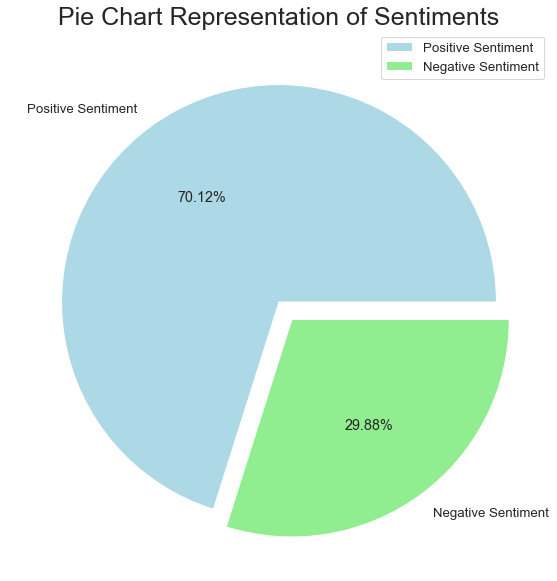

In [35]:
# a pie chart to represent the distribution of sentiments of the reviews posted
#our dataset is imbalanced because just less than 30% of our reviews are considered as negative ones. 
#this information will be very useful for the modelling part

size = [len(positive), len(negative)]
colors = ['lightblue', 'lightgreen']
labels = "Positive Sentiment","Negative Sentiment"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Sentiments', fontsize = 25)
plt.legend()
plt.show()

In [36]:
# add number of characters column, for more exploration
data["nb_chars"] = data["clean_review"].apply(lambda x: len(x))

# add number of words column, for more exploration
data["nb_words"] = data["clean_review"].apply(lambda x: len(x.split(" ")))
data

uniqueID                  drugName                     condition  \
0         206461                 Valsartan  Left Ventricular Dysfunction   
1          95260                Guanfacine                          ADHD   
2          92703                    Lybrel                 Birth Control   
3         138000                Ortho Evra                 Birth Control   
4          35696  Buprenorphine / naloxone             Opiate Dependence   
...          ...                       ...                           ...   
213864    159999                 Tamoxifen     Breast Cancer, Prevention   
213865    140714              Escitalopram                       Anxiety   
213866    130945            Levonorgestrel                 Birth Control   
213867     47656                Tapentadol                          Pain   
213868    113712                 Arthrotec                      Sciatica   

                                                                                                                                                                                                         review  \
0                                                                                                                               "It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"   
1       "My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get ou...   
2       "I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not ava...   
3       "This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is...   
4       "Suboxone has completely turned my life around.  I feel healthier, I&#039;m excelling at my job and I always have money in my pocket and my savings account.  I had none of those before Suboxone an...   
...                                                                                                                                                                                                         ...   
213864  "I have taken Tamoxifen for 5 years. Side effects are severe sweating and depression. I have been taking Effexor XR longer than I have been on Tamoxifen. My Oncologist increased the Effexor dosage...   
213865  "I&#039;ve been taking Lexapro (escitaploprgram) since February. First, I&#039;d like to mention that you can NOT take this drug for a week or less and expect to magically feel better; I felt real...   
213866  "I&#039;m married, 34 years old and I have no kids. Taking the pill was such a hassle so I decided to get the Mirena. It was very painful when it was inserted,then had cramping for the rest of tha...   
213867  "I was prescribed Nucynta for severe neck/shoulder pain. After taking only 2, 75mg pills I was rushed to the ER with severe breathing problems. I have never had any issues with pain medicines befo...   
213868                                                                                                                                                                                            "It works!!!"   

        rating       date  usefulCount  \
0            9  20-May-12           27   
1            8  27-Apr-10          192   
2            5  14-Dec-09           17   
3            8   3-Nov-15           10   
4            9  27-Nov-16           37   
...        ...        ...          ...   
213864      10  13-Sep-14           43   
213865       9   8-Oct-16           11   
213866       8  15-Nov-10            7   
213867       1  28-Nov-11           20   
213868       9  13-Sep-09           46   

                                                         

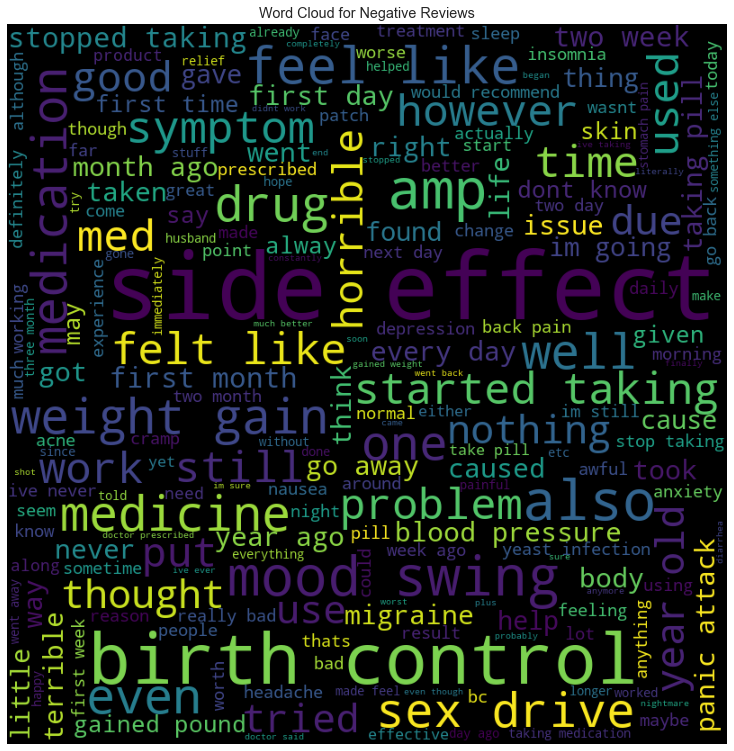

In [37]:
# creating the word cloud for negative reviews
from wordcloud import WordCloud

# Creating the Word Cloud
final_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(' '.join(data[data['sentiment']==0]['clean_review']))


# Displaying the WordCloud                    
plt.figure(figsize = (10, 13), facecolor = None) 
plt.title('Word Cloud for Negative Reviews')
plt.imshow(final_wordcloud) 
plt.axis("off")
plt.tight_layout(pad = 0) 
  
plt.show()

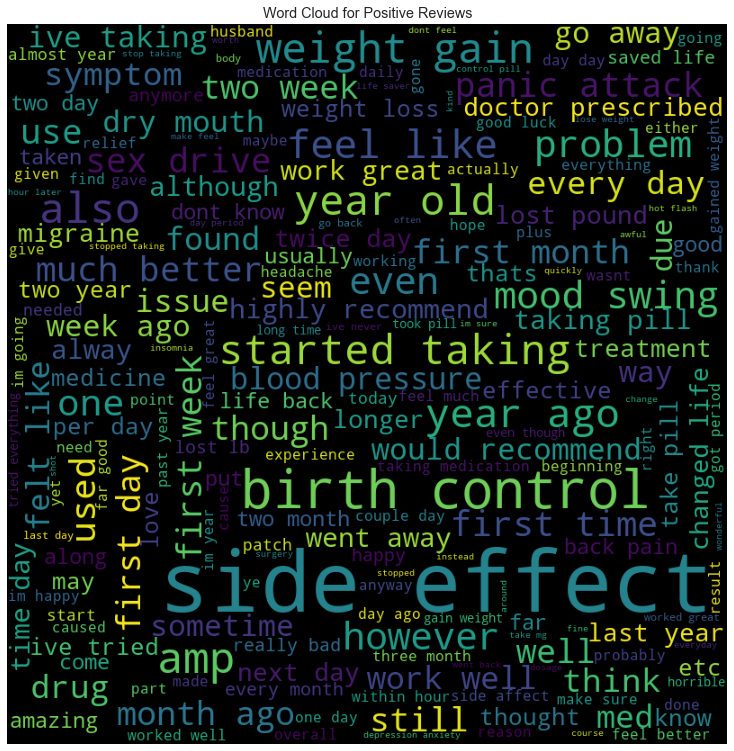

In [40]:
# Creating the Word Cloud for positive reviews
final_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(' '.join(data[data['sentiment']==1]['clean_review']))


# Displaying the WordCloud                    
plt.figure(figsize = (10, 13), facecolor = None)
plt.title('Word Cloud for Positive Reviews')
plt.imshow(final_wordcloud) 
plt.axis("off")
plt.tight_layout(pad = 0) 
  
plt.show()

In [41]:
# Splitting the data that we have into train sets and test sets. We will use train set for training the models and
# test set to evaluate the models

X_train, X_test, y_train, y_test = train_test_split(data['clean_review'], data['sentiment'], test_size=0.33, 
                                                    random_state=42)

### Baseline Performance


A baseline is a model that should be both simple to set up and has a reasonable chance of providing decent results. Experimenting with them is usually quick and low cost, since implementation is widely available in popular packages.

For our use case, we will be using Bag of Words (BoW) and Naive Bayes from sklearn package as a baseline. When trying to classify structured data or natural language, Naive Bayes usually provides quick, solid results.

Naive Bayes is one of the fast and simple classification algorithms, and it's very suitable for high-dimensional data sets, and performs well with categorical variables, such as this dataset. Another positive about Naive Bayes is that there are very few tunable parameters. It's often very convenient to use Naive Bayes as a baseline classifier to get an initial benchmark against which to compare other models [16].

Additionaly, we are going to use a BoW baseline, as opposed to word embeddings.  First of all, embeddings are a more powerful word representation: they are short dense vectors. Unlike the traditional sparse, long vector with dimensions corresponding to words in the vocabulary or documents in a collection, embeddings are short, with number of dimensions d ranging from 50-1000, rather than the much larger vocabulary size|V| or number of documents D we’ve seen. These d dimensions don’t have a clear interpretation. And the vectors are dense: instead of vector entries being sparse, mostly-zero counts or functions of counts, the values will be real-valued numbers that can be negative[12].

However, we are considering BoW rather than Word Embeddings for the following reasons[13]:

1. Building a baseline model. By using scikit-learn, there is just a few lines of code to build a model. 
2. If your dataset is small and context is domain specific, BoW may work better than Word Embedding. Our dataset is 110.6MB, which is small in the grand theme of big data environments.  And our context is focused on drug reviews text. Also, the context (drug reviews text) is very domain specific which means we cannot find the corresponding Vector from pre-trained word embedding models e.g. GloVe, fastText etc

**How Does it Work?** 

BoW provides a set of vectors that can be used as features while training a machine learning model. Hence, for the baseline model, we are using BoW to generate features (feature extraction) and Naive Bayes as the model to train the features on. It is not possible to build a model using only BoW, without using any other classification model.

The Naive Bayes Multinomial is a very a suitable approach for the text classification, where we're taking a fragment of text, a blog post or a passage of text (such as a review), and we're trying to classify it according to some sort of topical scheme. In this kind of problem, the categories are essentially the word types. All the different words that you might have in your vocabulary, they're the types and they're the categories. We use the multinomial distributionas basically observing the counts across these various word types.

In [42]:
# For text classification using sentiment analysis, it can be achieved in many ways using a number of algorithms 
#[5]. We convert text into a bag of words model (sparse matrix of integers). We know we can't pass raw text 
#features in our model. hence, we have to convert them into numeric values.
#Bag of Words Model which will act as a baseline model when we use a Naive Bayes Classifier to train on it.

#CountVectorizer from sklearn package helps us build bag of words vectors so that we can use it for training and 
#evaluating later

bow = CountVectorizer(min_df=5, ngram_range=(1,1), max_features=5000)

try:
    train_features_bow = bow.fit_transform(X_train).toarray()
    test_features_bow = bow.transform(X_test).toarray()
except:
    raise Exception("Failed to vectorize data: ", format_exc())
    
train_features_bow.shape

(143292, 5000)

In [43]:
from sklearn.naive_bayes import MultinomialNB

try:
    baseline_model = MultinomialNB()
    baseline_model.fit(train_features_bow, y_train)
except:
    raise Exception("Failed to train model: ", format_exc())

In [45]:
preds = baseline_model.predict(test_features_bow)

print("Accuracy Score: ", accuracy_score(y_pred=preds, y_true=y_test))
print("Classification Report:\n ", classification_report(y_pred=preds, y_true=y_test))

Accuracy Score:  0.7831588194454284
Classification Report:
                precision    recall  f1-score   support

           0       0.63      0.67      0.65     21166
           1       0.85      0.83      0.84     49411

    accuracy                           0.78     70577
   macro avg       0.74      0.75      0.75     70577
weighted avg       0.79      0.78      0.78     70577



### Classification Approach


A new column was created, which is called 'Sentiment'. This was encoded, based on the 'rating' column. This is a very relevant feature with regards to training our classifier and can have a huge impact on the learning method's ability to extract a good model.

The sentiment column signifies which sentiment a particular review refers to (0-> negative, 1 -> positive). This acts as our target column and we use ML models to learn to predict this, given the review text. Before training models, however, we have used train_test_split to split the merged dataset back to train sets and test sets. We use the train set to train our models and the test set to evaluate our trained models on. The test set acts as an unseen set to our model. The better the scores of a model on the test set, the better the model is.

Next we will be trying out different classification models and incorporating TF-IDF vectorization as well and see if we can improve on the baseline score.

**Why TF-IDF Outperforms Bag of Words in Information Retrieval and Text Representations**

TF-IDF stands for “Term Frequency — Inverse Document Frequency”. This is a technique to quantify words in a set of documents or to model text data. We generally compute a score for each word to signify its importance in the document and corpus. This method is a widely used technique in Information Retrieval and Text Mining. This might potentially help us in getting a better model with higher accuracy score than the baseline scores.

Bag of Words just creates a set of vectors containing the count of word occurrences in the document (reviews), while the TF-IDF model contains information on the more important words and the less important ones as well.
Bag of Words vectors are easy to interpret. However, TF-IDF usually performs better in machine learning models. 

Hence, ultimately, this is why we will implement TF-IDF instead of BoW for our classifiation approach[23].


In [46]:
#the tf-idf algorithm below is designed in a way to extract features

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', ngram_range=(1,1), max_features=2000)

try:
    train_features_tfidf = tfidf.fit_transform(X_train).toarray()
    test_features_tfidf = tfidf.transform(X_test).toarray()
except:
    raise Exception("Failed to vectorize data: ", format_exc())
    
train_features_tfidf.shape

(143292, 2000)

In [47]:
# The model trainings might take a while to run...

### Logistic Regression Model

Logistic regression provides a discreet output and  models the probability of belonging to one of two outcomes (positive or negative). Hence, it’s ideal for our text classification exercise.
The Logistic regression classifier is like a linear classifier which uses the calculated logits (score) to predict the target class. It measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities using a logistic function. The dependent variable is the target class variable we are going to predict. However, the independent variables are the features or attributes we are going to use to predict the target class.  Hence, feature extraction is important.


In [48]:
from sklearn.linear_model import LogisticRegression

try:
    lr = LogisticRegression()
    lr.fit(train_features_tfidf, y_train)
except:
    raise Exception("Failed to train model: ", format_exc())
    

In [49]:
preds = lr.predict(test_features_tfidf)

print("Accuracy Score: ", accuracy_score(y_pred=preds, y_true=y_test))
print("Classification Report:\n ", classification_report(y_pred=preds, y_true=y_test))

Accuracy Score:  0.8277625855448659
Classification Report:
                precision    recall  f1-score   support

           0       0.76      0.62      0.68     21166
           1       0.85      0.92      0.88     49411

    accuracy                           0.83     70577
   macro avg       0.80      0.77      0.78     70577
weighted avg       0.82      0.83      0.82     70577



### Multinomial Naive Bayes Model

For background on this algorithm, refer to ‘Baseline’ Section above.

In [61]:
from sklearn.naive_bayes import MultinomialNB

try:
    mnb = MultinomialNB()
    mnb.fit(train_features_tfidf, y_train)
except:
    raise Exception("Failed to train model: ", format_exc())

In [62]:
preds = mnb.predict(test_features_tfidf)

print("Accuracy Score: ", accuracy_score(y_pred=preds, y_true=y_test))
print("Classification Report:\n ", classification_report(y_pred=preds, y_true=y_test))

Accuracy Score:  0.7713419385918926
Classification Report:
                precision    recall  f1-score   support

           0       0.83      0.30      0.44     21166
           1       0.76      0.97      0.86     49411

    accuracy                           0.77     70577
   macro avg       0.80      0.64      0.65     70577
weighted avg       0.78      0.77      0.73     70577



### LightGBM Model

Light GBM is a gradient boosting framework that uses tree-based learning algorithms. This has become the default algorithm for machine learning competitions when someone is working with a tabular kind of data (such as ours) regarding both regression and classification problems.

It is designed to be distributed and efficient with the following advantages


* Higher accuracy and a faster training speed.
* Low memory utilization
* Comparatively better accuracy than other boosting algorithms and handles overfitting much better while working with smaller datasets.
* Parallel Learning support.
* Compatible with both small and large datasets
* Quicker to train than XGBOOST

Since it is based on decision tree algorithms, it splits the tree leaf wise with the best fit whereas other boosting algorithms split the tree depth wise or level wise rather than leaf-wise. So, when growing on the same leaf in Light GBM, the leaf-wise algorithm can reduce more loss than the level-wise algorithm and hence results in much better accuracy which can rarely be achieved by any of the existing boosting algorithms. Also, it is surprisingly very fast, hence the word ‘Light’.[18, 19]


In [63]:
#gradient boosting model

from lightgbm import LGBMClassifier

try:
    lgb = LGBMClassifier()
    lgb.fit(train_features_tfidf, y_train,)
except:
    raise Exception("Failed to train model: ", format_exc())

In [64]:
preds = lgb.predict(test_features_tfidf)

print("Accuracy Score: ", accuracy_score(y_pred=preds, y_true=y_test))
print("Classification Report:\n ", classification_report(y_pred=preds, y_true=y_test))

Accuracy Score:  0.8142596029868088
Classification Report:
                precision    recall  f1-score   support

           0       0.78      0.53      0.63     21166
           1       0.82      0.93      0.88     49411

    accuracy                           0.81     70577
   macro avg       0.80      0.73      0.75     70577
weighted avg       0.81      0.81      0.80     70577



### Random Forest Model

Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.

A relevant quality of the random forest algorithm is that it is very easy to measure the relative importance of each feature on the prediction. Sklearn (as seen below) provides a great tool for this that measures a feature's importance by looking at how much the tree nodes that use that feature reduce impurity across all trees in the forest. It computes this score automatically for each feature after training and scales the results so the sum of all importance is equal to one.
By looking at the feature importance you can decide which features to possibly drop because they don’t contribute enough (or sometimes nothing at all) to the prediction process. This is important because a general rule in machine learning is that the more features you have the more likely your model will suffer from overfitting and vice versa[20].


In [50]:
from sklearn.ensemble import RandomForestClassifier

try:
    RF = RandomForestClassifier(n_jobs=-1, max_depth=250)
    RF.fit(train_features_tfidf, y_train)
except:
    raise Exception("Failed to train model: ", format_exc())

In [52]:
preds = RF.predict(test_features_tfidf)
print("Accuracy Score: ", accuracy_score(y_pred=preds, y_true=y_test))
print("Classification Report:\n ", classification_report(y_pred=preds, y_true=y_test))

Accuracy Score:  0.9020502429970103
Classification Report:
                precision    recall  f1-score   support

           0       0.94      0.72      0.82     21166
           1       0.89      0.98      0.93     49411

    accuracy                           0.90     70577
   macro avg       0.91      0.85      0.87     70577
weighted avg       0.91      0.90      0.90     70577



#### Futher Feature Extraction Techniques

Since the Random Forest model produced the best accuracy, more feature extraction techniques were used on the Top 2000 important features.
In relation to the function RF.feature_importances_ (refer to code below) , this function returns the impurity-based feature importances.

The higher the words score (refer to output on 'words score' column below), the more important the feature. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance [21, 22].

In [59]:
import pandas as pd

# extract the most important feature names and Gini importance. then store in the dataframe
important_features = pd.DataFrame(list(zip(list(RF.feature_importances_), list(tfidf.get_feature_names()))), columns =['words score', 'words'])
# sort and print feartures
important_features.sort_values(important_features.columns[0], ascending = False)

words score        words
1968     0.011501        worse
1983     0.010977         year
1970     0.009372        worst
853      0.008666     horrible
779      0.007952        great
...           ...          ...
386      0.000040    clonidine
1135     0.000039  moisturizer
1577     0.000039    skeptical
124      0.000039       adipex
273      0.000038     blessing

[2000 rows x 2 columns]

#### Top features for positive and negative class

The first column (on the left below) show the 20 most important features for the negative class and the second column (on the right below) show the 20 most important features for the positive class. 

These features were extracted using the Multinomial Naive Bayes model. 
We train the Naive Bayes model for sentiment analysis and by using this model, we have extracted the important features related to the negative and positive classes.  

In [54]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(train_features_tfidf, y_train)
def Show_most_informative_features(vectorizer, clf, n=20):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    for (coef_1, fn_1), (coef_2, fn_2) in top:
      print ("\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))
Show_most_informative_features(tfidf, mnb)

	-9.7176	useless        		-4.9927	day            
	-9.7112	ruined         		-5.0549	year           
	-9.7067	calling        		-5.1572	effect         
	-9.6045	waste          		-5.1749	side           
	-9.5957	omg            		-5.2266	work           
	-9.5799	ridiculous     		-5.2395	month          
	-9.5652	cyclen         		-5.2842	take           
	-9.5457	zap            		-5.3103	week           
	-9.5353	horrendous     		-5.3171	taking         
	-9.5309	asap           		-5.3327	pain           
	-9.5304	confused       		-5.3570	time           
	-9.5283	yi             		-5.3601	im             
	-9.5040	permanent      		-5.3756	ive            
	-9.4772	blurry         		-5.4324	first          
	-9.4738	confusion      		-5.4491	get            
	-9.4706	fire           		-5.4865	feel           
	-9.4417	junel          		-5.5102	started        
	-9.4346	star           		-5.5229	like           
	-9.4073	ovary          		-5.5355	medication     
	-9.4008	wall           		-5.5376	medicine       


## Conclusion

### Evaluation 

Out of all the methods and the models we tried, Random Forest Classifier gave the best results with an accuracy score of ~0.90. This is a good score and hugely improves on our baseline score of ~0.78. The reason why Random Forests perform so well on this problem is they are great with high dimensional data since we  work with subsets of data in this algorithm. Random forests are bagged decision tree models that split on a subset of features on each split. It decorrelates the trees with the introduction of splitting on a random subset of features. This means that at each split of the tree, the model considers only a small subset of features rather than all of the features of the model. It can handle binary features, categorical features, and numerical features. 

There is very little pre-processing that needs to be done. The data does not need to be rescaled or transformed. Random forest handles outliers well by essentially binning them. It is also indifferent to non-linear features. Also, our data was highly imbalanced. Random forest has methods for balancing error in class population unbalanced data sets. Random forest attempts to minimize the overall error rate, so when we have an unbalanced data set, the larger class will get a low error rate while the smaller class will have a larger error rate.

### Summary and Conclusions 

Through implementaion of several models on the same dataset with high dimensional features, we come to the conclusion that the random forest algorithm performs well on data with high dimensionality, such as ours. Preprocessing the text (with our preprocess_text function) before generating features from the text is a major part of data preparation and should not be ignored to achieve better quality results. It removes the noise and leaves us with clean, quality vocabulary.

This same method can be easily transferred to problems of different healthcare scenarios, as the methods used here are quite generalized and is not specific to work on drug reviews data only. We could also implement this model to measure patients perceptions about the care and treatment they receive and the kinds of services they want and make more personalised healthcare plans on patients prior experience.

This implementation was done using python but this can very well be reproduced in a different programming language like R. However, since Python offers a wide range of libraries and modules, it is easier to work on and even reproduce the results on different systems.

To avoid over fitting (and some bias) we have used the L2 normalization technique, which is is incorporated with our TF-IDF Vectorizor.

We have used a maximum of 2000 words as a feature in our random forest model. Out of the 2000 words, we can see what features produce more impact. We can check the column score, where the highest score produces more impact on the classifier.  The higher the words score, the more important the feature. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance. Refer to 'Futher Feature Extraction Techniques' above.

Overall, we have met our objective. Which was to review sentiment based on these drug user reviews text, using a supervised binary text classifier, which classified the user reviews as positive or negative. The overall satisifaction leaning more to the positive side. 

By analyzing the sentiment expressed in online drug reviews, healthcare providers and manufacturers can gain a more comprehensive understanding of the strengths and weaknesses of their products. This information can inform product development and improvement efforts, and help to ensure that products meet the needs and expectations of patients and consumers.  

We could potentially enhance our performance further by using a deep learning model, where we would require to install libraries such as Pytorch as Huggingface Transformers.  We would propose to import a new language representation model called BERT, which stands for Bidirectional Encoder Representations from Transformers, from the huggingface library.  This is of course computationaly expensive and requires a GPU (and Google Colab). This shall be performed in Part 2.

## References

[1] Classifying Drug Ratings Using User Reviews with Transformer-Based Language Models
https://www.medrxiv.org/content/10.1101/2021.04.15.21255573v2.full

[2] Analysis of the effect of sentiment analysis on extracting adverse drug reactions from tweets and forum posts
https://www.sciencedirect.com/science/article/pii/S1532046416300508

[3] Sentiment Analysis of User-Generated Content on Drug Review Websites
https://www.researchgate.net/publication/277625450_Sentiment_Analysis_of_User-Generated_Content_on_Drug_Review_Websites

[4] A Gentle Introduction To Text Classification And Sentiment Analysis, Miguel González-Fierro
https://miguelgfierro.com/blog/2017/a-gentle-introduction-to-text-classification-and-sentiment-analysis/

[5] UCI ML Drug Review dataset
https://www.kaggle.com/jessicali9530/kuc-hackathon-winter-2018?select=drugsComTest_raw.csv

[6] A guide to Text Classification and Sentiment Analysis, Abhijit Roy
https://towardsdatascience.com/a-guide-to-text-classification-and-sentiment-analysis-2ab021796317

[7] Text Preprocessing in NLP with Python codes
https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/

[8] Reference Unavailable

[9] Importance of Text Pre-processing
https://www.pluralsight.com/guides/importance-of-text-pre-processing

[10] A beginners guide to Sentiment Analysis with Python
https://towardsdatascience.com/a-beginners-guide-to-sentiment-analysis-in-python-95e354ea84f6

[11] https://towardsdatascience.com/multi-class-metrics-made-simple-part-ii-the-f1-score-ebe8b2c2ca1
Multi-Class Metrics Made Simple, Part II: the F1-score

[12] Jurafsky, D. and J.H. Martin Speech and language processing. (2021; 3rd draft ed.). Chapter 6, section 6.8.
https://web.stanford.edu/~jurafsky/slp3/6.pdf

[13] 3 basic approaches in Bag of Words which are better than Word Embeddings
https://towardsdatascience.com/3-basic-approaches-in-bag-of-words-which-are-better-than-word-embeddings-c2cbc7398016

[14] Skewed Data: A problem to your statistical model
https://towardsdatascience.com/skewed-data-a-problem-to-your-statistical-model-9a6b5bb74e37

[15] How to Calculate Precision, Recall, and F-Measure for Imbalanced Classification
https://machinelearningmastery.com/precision-recall-and-f-measure-for-imbalanced-classification/

[16] Topic 5: Text Categorisation and Sentiment Analysis, Lecture 5.106: Bayesian Classification

[17] Jurafsky, D. and J.H. Martin Speech and language processing. (2021; 3rd draft ed.). Chapter 20 
- 20.5 Supervised Learning of Word Sentiment .
https://web.stanford.edu/~jurafsky/slp3/20.pdf

[18] Complete guide on how to Use LightGBM in Python
https://www.analyticsvidhya.com/blog/2021/08/complete-guide-on-how-to-use-lightgbm-in-python/

[19] Which algorithm takes the crown: Light GBM vs XGBOOST?
https://www.analyticsvidhya.com/blog/2017/06/which-algorithm-takes-the-crown-light-gbm-vs-xgboost/

[20] A Complete Guide to the Random Forest Algorithm
https://builtin.com/data-science/random-forest-algorithm

[21] Selecting good features – Part III: random forests
http://blog.datadive.net/selecting-good-features-part-iii-random-forests/

[22] The Mathematics of Decision Trees, Random Forest and Feature Importance in Scikit-learn and Spark
https://towardsdatascience.com/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3

[23] Quick Introduction to Bag-of-Words (BoW) and TF-IDF for Creating Features from Text
https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/
